In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

mpl.rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [15]:
df = pd.read_csv('data/london_merged.csv', 
                 parse_dates=['timestamp'], 
                 index_col = 'timestamp')

In [16]:
df.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [17]:
df.shape

(17414, 9)

In [18]:
df.index.dayofweek

Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='timestamp', length=17414)

# We will engineer some timestamp based features

In [19]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

# Bellow we will look at the bikeshares overtime

<Axes: xlabel='timestamp', ylabel='cnt'>

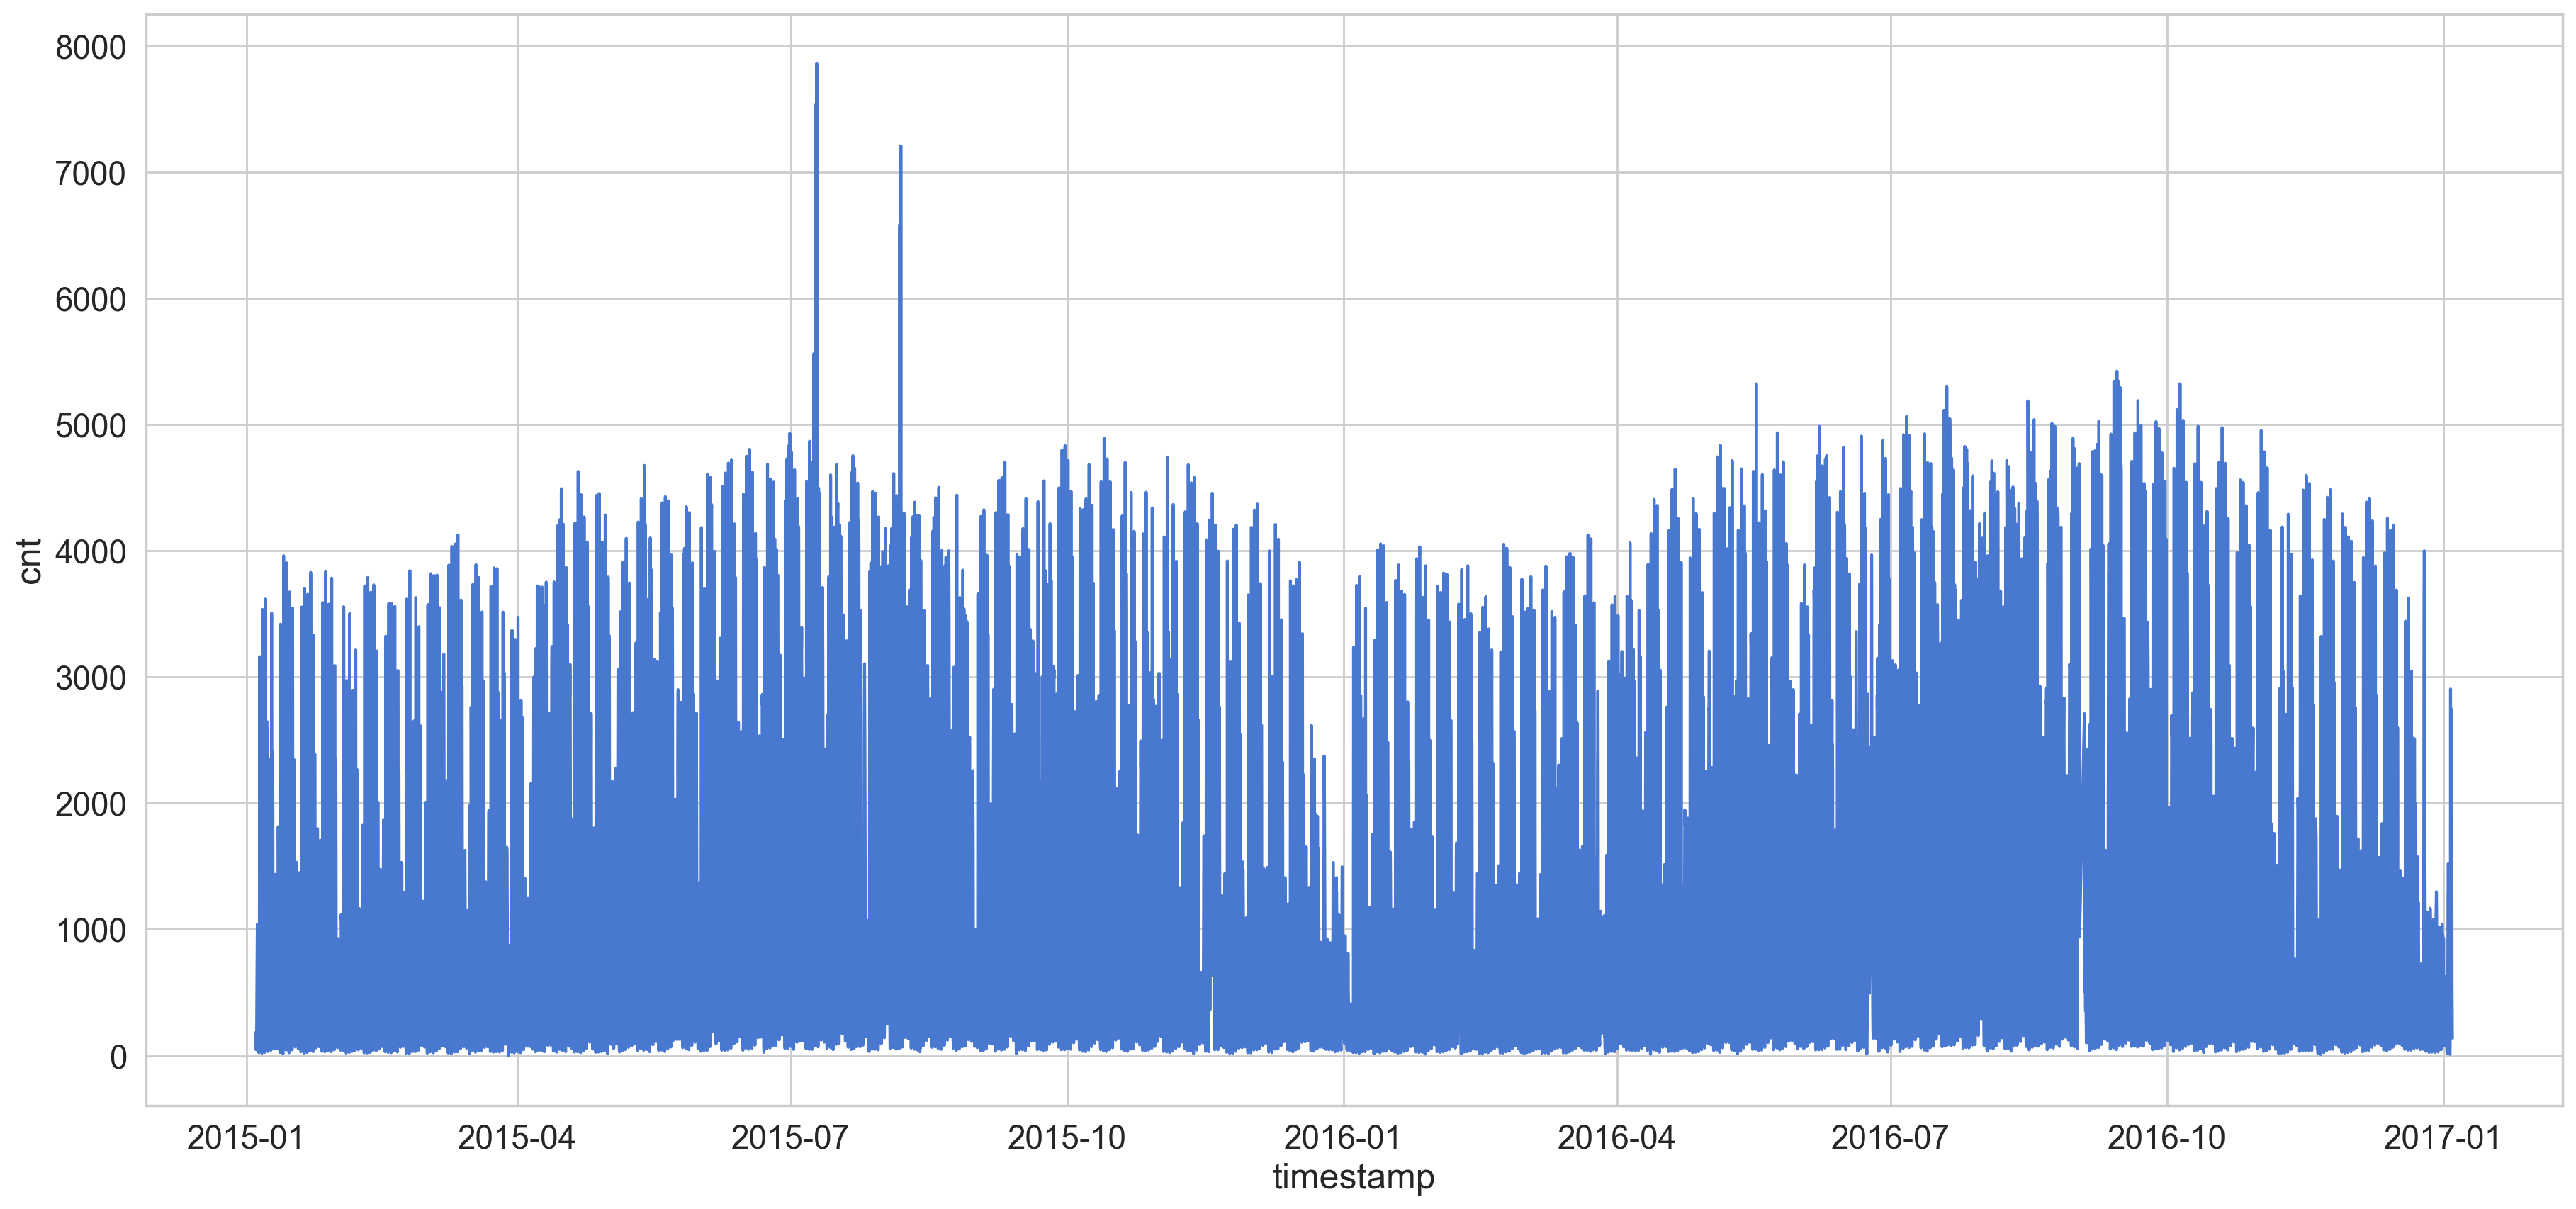

In [20]:
sns.lineplot(x=df.index, y='cnt', data = df)